<a href="https://colab.research.google.com/github/shresthabaner/FakenewsDetection/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stop_words =set(stopwords.words('english'))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
path = '/content/WELFake_Dataset.csv'
df = pd.read_csv(
    path,
    engine='python',      # more tolerant than the C engine
    sep=',',
    quotechar='"',
    doublequote=True,     # "" inside quoted fields
    escapechar='\\',      # allow \" or escaped commas/newlines if present
    on_bad_lines='skip',  # or 'warn' to see messages
    encoding='utf-8',
)

In [ ]:
df.shape

(72153, 4)

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column

,0
title,565
text,57
label,20


In [ ]:
missing_both = df[df['title'].isnull() & df['text'].isnull()].shape[0]
missing_both

7

In [ ]:
df.dropna(subset=['title', 'text'], inplace=True)
df.shape

(71538, 3)

In [ ]:
df['full_text']=df['title']+' '+df['text']
df.head()

,title,text,label,full_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


In [ ]:
import re


def preprocess_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        return ""

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join the tokens back into a string
    return ' '.join(stemmed_tokens)

# Apply this function to your combined text column
df['processed_text'] = df['full_text'].apply(preprocess_text)

In [ ]:
df.head()

,title,text,label,full_text,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforc high alert follow threat cop white ...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbeliev obama attorney gener say charlott rio...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobbi jindal rais hindu use stori christian co...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,satan russia unv imag terrifi new supernuk wes...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,time christian group sue amazon splc design ha...


In [ ]:
tdidf = TfidfVectorizer(max_features=5000)

In [ ]:
X = tdidf.fit_transform(df['processed_text'])


In [ ]:
Y= df['label']
Y.isnull().sum()
print(X[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 214 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 2529)	0.022169451874986642
  (0, 1480)	0.031589395798869775
  (0, 2079)	0.027663023459571143
  (0, 125)	0.04434127498670083
  (0, 1763)	0.021438754945856116
  (0, 4488)	0.05775255488924398
  (0, 997)	0.21438442694607063
  (0, 4890)	0.20858892477580188
  (0, 4452)	0.06291424170996399
  (0, 4776)	0.04391358354546184
  (0, 869)	0.023477333233877466
  (0, 1592)	0.024990768318123854
  (0, 367)	0.028033098239204118
  (0, 3052)	0.021305958345199983
  (0, 2779)	0.022128923669891262
  (0, 2903)	0.09648030779710541
  (0, 616)	0.13775429860580396
  (0, 2668)	0.13840339143744956
  (0, 2009)	0.08609051861720499
  (0, 3247)	0.13545789323194946
  (0, 1472)	0.034270390266076894
  (0, 3129)	0.02638880117395543
  (0, 3554)	0.21375753674800205
  (0, 4021)	0.13806924424078104
  (0, 4615)	0.024822548946529428
  :	:
  (0, 2008)	0.0353299980097202
  (0, 4216)	0.034051108483379985
  (0,

In [ ]:
lbl = (df['label']
       .astype(str)
       .str.strip()
       .str.lower()
       .map({'0': 0, '1': 1, 'false': 0, 'true': 1}))

# Build a validity mask: valid label AND valid processed_text
mask = lbl.isin([0, 1]) & df['processed_text'].astype(str).notna()
from scipy import sparse
#  Apply the same mask to X (sparse-safe) and to y
if sparse.issparse(X):
    X_clean = X[mask.values]
else:
    X_clean = X[np.where(mask)[0]]

Y_clean = lbl[mask].astype(int).to_numpy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((57227, 5000), (14307, 5000), (57227,), (14307,))

In [ ]:
len(tdidf.get_feature_names_out())

5000

In [ ]:
model=LogisticRegression(C=1.0,solver='liblinear',max_iter=2000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
probs= model.predict_proba(X_test)[:,1]
preds=(prob>=0.5).astype(int)
print(classification_report(y_test, preds, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0      0.953     0.946     0.950      7135
           1      0.947     0.953     0.950      7172

    accuracy                          0.950     14307
   macro avg      0.950     0.950     0.950     14307
weighted avg      0.950     0.950     0.950     14307

ROC-AUC: 0.9879367359868304


In [ ]:
Cs = [0.25, 0.5, 1.0, 2.0, 5.0]
penalties = ['l2', 'l1']
best = None

for pen in penalties:
    for C in Cs:
        clf = LogisticRegression(
            solver='liblinear',  # supports L1 and L2
            penalty=pen,
            C=C,
            max_iter=2000
        )
        clf.fit(X_train, y_train)
        p = clf.predict_proba(X_test)[:, 1]
        yhat = (p >= 0.5).astype(int)
        f1 = classification_report(y_test, yhat, output_dict=True)['weighted avg']['f1-score']
        if (best is None) or (f1 > best['f1']):
            best = {'penalty': pen, 'C': C, 'model': clf, 'f1': f1, 'probs': p}
print("\nBEST CHOICE:", best['penalty'], "C=", best['C'])


BEST CHOICE: l1 C= 5.0


In [ ]:
best_clf = LogisticRegression(
    solver='liblinear',   # supports L1 well on sparse TF-IDF
    penalty='l1',
    C=5.0,
    max_iter=2000
).fit(X_train, y_train)

In [ ]:
acc=best_clf.score(X_test,y_test)
acc

0.9589711330118124

In [ ]:
acc=model.score(X_train,y_train)
acc

0.9576947944152235

              precision    recall  f1-score   support

           0      0.960     0.958     0.959      7135
           1      0.958     0.960     0.959      7172

    accuracy                          0.959     14307
   macro avg      0.959     0.959     0.959     14307
weighted avg      0.959     0.959     0.959     14307

ROC-AUC: 0.9902104110394272


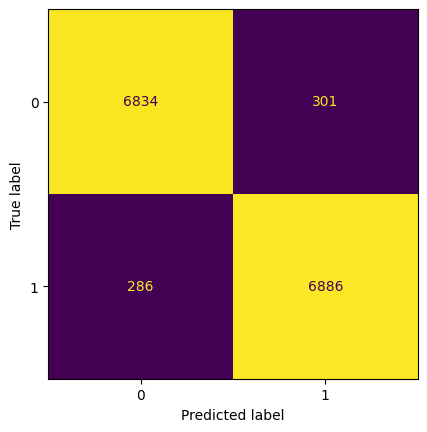

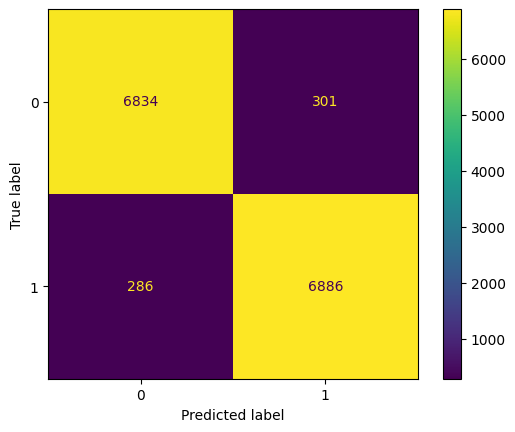

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
probs = best_clf.predict_proba(X_test)[:, 1]
preds = (probs >= 0.5).astype(int)  # or your tuned threshold
print(classification_report(y_test, preds, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, probs))
ConfusionMatrixDisplay.from_predictions(y_test, preds, colorbar=False).plot()


In [ ]:
newx= X_test[5]
predicty=best_clf.predict(newx)
if(predicty==0):
  print("Fake")
else:
  print("Right")

Right


In [ ]:
y_test[5]

np.int64(0)